<a href="https://colab.research.google.com/github/JumanaWanass/OCR-with-LSTM-spell-checker/blob/main/OCR_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.   Import necessary libraries







In [ ]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import jamspell

#2. Proccesing image pre OCR

##2.1 Display Image

In [ ]:
def display(path):
    dpi = 80
    image_data = plt.imread(path)

    height, width  = image_data.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(image_data, cmap='gray')

    plt.show()

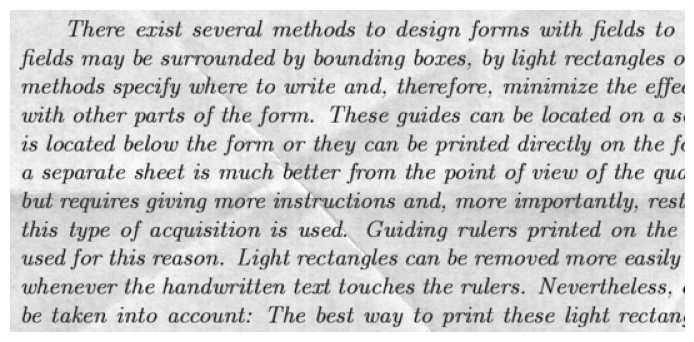

In [ ]:
display("5.png")


##2.2 Resize

In [ ]:
def resize(image, scale):
    width = int(image.shape[1] * scale / 100)
    height = int(image.shape[0] * scale / 100)
    dim = (width, height)
    resized_img = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized_img

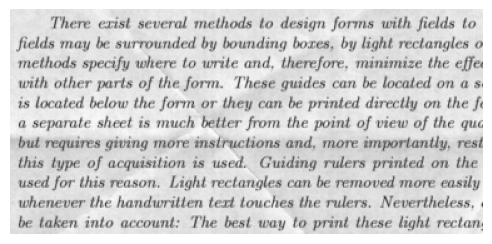

In [ ]:
Original_image = cv2.imread("5.png")
Resized_image = resize(Original_image, 70)
cv2.imwrite("/Resized.jpg", Resized_image)
display("/Resized.jpg")

##2.3 Binarise image

### Turning image to grayscale

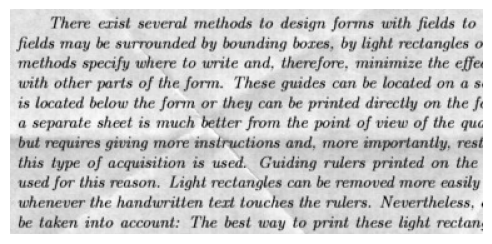

In [ ]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

GrayImage = grayscale(Resized_image)
cv2.imwrite("/GrayImage.jpg", GrayImage)
display("/GrayImage.jpg")

### Simple Threshold

In [ ]:
threshold_value = 180
max_value = 230
ret, SimpleThresh = cv2.threshold(GrayImage, threshold_value, max_value, cv2.THRESH_BINARY)
cv2.imwrite("/SimpleThresh.jpg", SimpleThresh)


True

###Gaussian Threshold

In [ ]:
block_size = 21
constant = 11
GaussianThresh = cv2.adaptiveThreshold(GrayImage, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant)
cv2.imwrite("/GaussianThresh.jpg", GaussianThresh)


True

### Compare Gaussian and Simple Thresholding

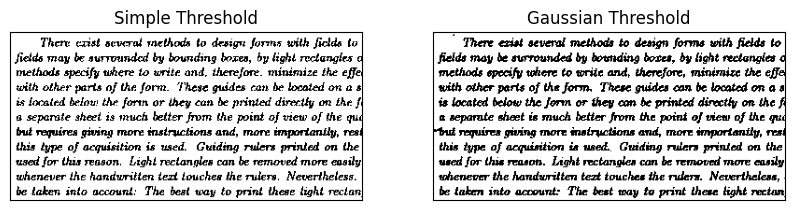

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the first image in the first subplot
axs[0].imshow(SimpleThresh, cmap='gray')
axs[0].set_title('Simple Threshold')

# Plot the second image in the second subplot
axs[1].imshow(GaussianThresh, cmap='gray')
axs[1].set_title('Gaussian Threshold')
# remove the tick marks
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])

# Show the plot
plt.show()

*As evident, Gaussian Thresholding is more effective at getting rid of noise*

##2.4 Remove borders

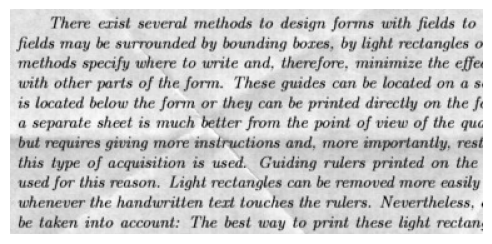

In [ ]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return crop

#no_borders = remove_borders(GaussianThresh)
no_borders = remove_borders(GrayImage)
cv2.imwrite("/NoBorders.jpg", no_borders)
display("/NoBorders.jpg")

#3. Use Pytesseract to perform OCR

In [ ]:
ocr_result = pytesseract.image_to_string(no_borders)
print (ocr_result)

There exist several methods to design forms with fields to
fields may be surrounded by bounding bozes, by light rectangles o
‘methods specify where to write and, therefore, minimize the effe
with other parts of the form. These guides can be located on a s
is located below the form or they can be printed directly om the fi
4 separate sheet is much better from the point of view of the qué
but requires giving more instructions and, more importantly, rest
this type of acquisition is used. Guiding rulers printed on the
used for this reason. Light rectangles can be removed more easily
whenever the handwritten text touches the rulers. Nevertheless, |
MaMMIGA into account: ‘The bast'tay Weprinl thesd light recton,



In [ ]:
!!sudo apt-get install swig3.0
!sudo pip install jamspell
!wget https://github.com/bakwc/JamSpell-models/raw/master/en.tar.gz
!tar -xvf en.tar.gz
import jamspell
jsp = jamspell.TSpellCorrector()
assert jsp.LoadLangModel('en.bin')


In [ ]:
jsp.FixFragment(ocr_result)

"There exist several methods to design forms with fields to\nfields may be surrounded by bounding bones, by light rectangles o\n‘methods specify where to write and, therefore, minimize the eff\nwith other parts of the form. These guides can be located on a s\nis located below the form or they can be printed directly on the fi\n4 separate sheet is much better from the point of view of the qué\nbut requires giving more instructions and, more importantly, rest\nthis type of acquisition is used. Guiding rulers printed on the\nused for this reason. Light rectangles can be removed more easily\nwhenever the handwritten text touches the rulers. Nevertheless, |\nAmMONIA into account: ‘The last'day Wearing these light rector,\n\x0c"